## Motional Sidebands

Now that we can probe a narrow transition with the 1762 nm laser, we need to determine what our spectra will look like. We know that our weak trap frequencies will lead to a higher average number of phonons, likely starting us well outside the Lamb-Dicke regime after Doppler cooling. In addition, if the ion is displaced from the null, excess micromotion can drastically increase the temperature. The question becomes how much our carrier transitions is depleted, and what does our phonon distribuition look like. First lets estimate the temperature based on ion size from the camera, as well as the Doppler cooling limit.


Following Berkeland 1998, the kinetic energy along the $i$-th direction is given by:

$\Large E_{Ki} \approx \frac{1}{4}mu^2_{1i}(\omega^2_i + \frac{1}{8}q^2_i\Omega^2_{\mathrm{rf}}) + \frac{4}{m}\left(\frac{Qq_iE_{dc}\cdot\hat{u_i}}{(2a_i + q^2_i)\Omega_{\mathrm{rf}}}\right)^2$

or:

$\Large E_{Ki} \approx \frac{1}{4}m \omega^2_iu^2_{1i} \left(1 + \frac{q^2_i}{q^2_i + 2a_i}\right) + 2m\omega^2_iu^2_{0i}$

The first term is comes from the secular motion with secular amplitude $u_{1i}$, the second from intrinsic micromotion, and the third from excess micromotion due to stray DC electric fields, displacing the ion $u_{0i}$ from the null. Since there is no micromotion in the axial (z) direction, stray fields in that direction only cause a displacement of the secular motion. Since secular motion can be reduced via Doppler cooling, the psuedo temperature of all three modes should be near the Doppler cooling limit. However, excess micromotion in the radial direction can cause orders of magnitude increase in the temperature.

Doppler temp (uK): 480


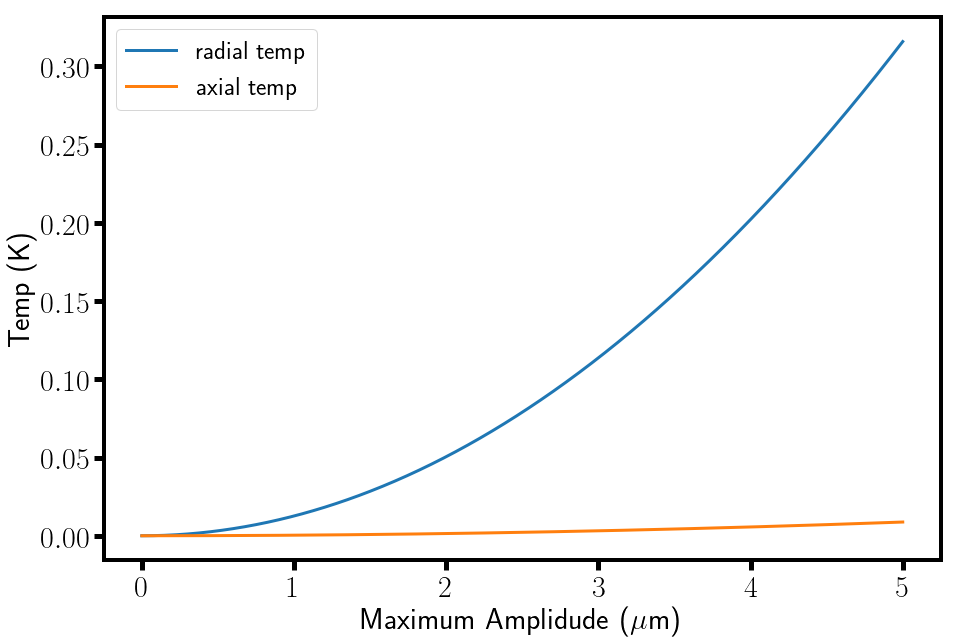

In [187]:
## Plot temp vs position on the camera
omega_r = 2*np.pi*100e3
omega_z = omega_r/3.
kb = 1.38e-23
m = 133*1.66e-27
r = np.linspace(0,5.e-6,1000)
T_r = 2*m*r**2*omega_r**2/kb
T_z = m*r**2*omega_z**2/kb/2
gamma_493 = 2*np.pi*20e6
T_D = hbar*gamma_493/2/kb
print 'Doppler temp (uK):', '{:.0f}'.format(T_D*1e6)

plot(r*1e6,T_r, linewidth = 3, label = 'radial temp')
plot(r*1e6,T_z, linewidth = 3, label = 'axial temp')
tick_params(labelsize = 30)
tick_params(width=5, length=10)
ylabel('Temp (K)', fontsize = 30)
xlabel(r'Maximum Amplidude ($\mu$m)', fontsize = 30)
legend(fontsize = 25)
T_r = T_r[-1]
T_z = T_z[-1]
show()

Doppler temp (mK): 0.480
Radial temp (mK): 315.8
Axial temp (mK): 8.8


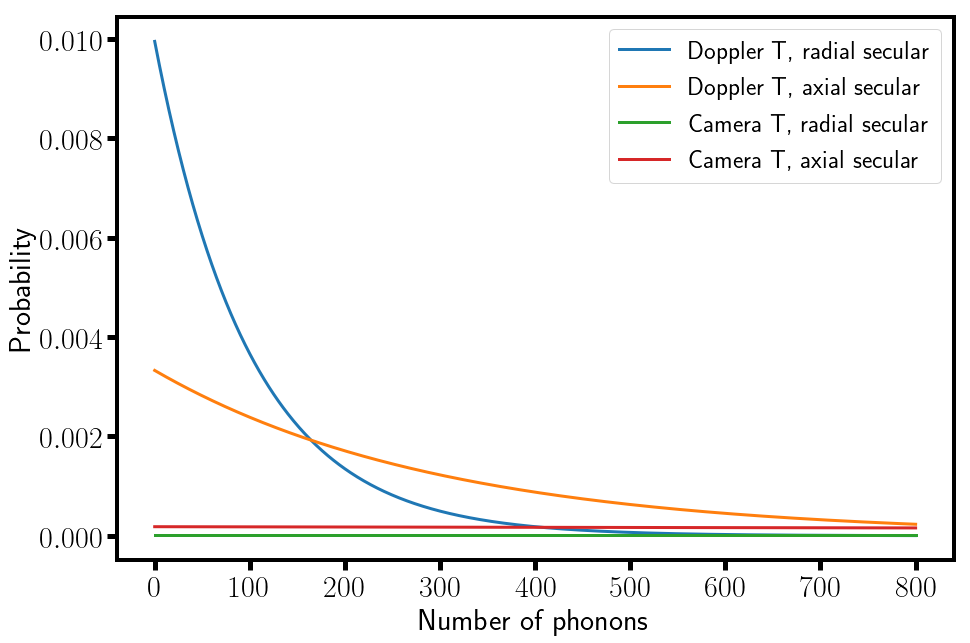

In [188]:
### plot our phonon distribution

hbar = 1.0542405e-34
k = 2*np.pi/lam
m = 133*1.66054e-27
kb = 1.38064852e-23
omega_r = 2*np.pi*100e3
omega_z = omega_r/3.
n = np.linspace(0,800,801)

print 'Doppler temp (mK):', '{:.3f}'.format(T_D*1e3)
print 'Radial temp (mK):', '{:.1f}'.format(T_r*1e3)
print 'Axial temp (mK):', '{:.1f}'.format(T_z*1e3)

# partition functions
Z_D_r = 1./(1-np.exp(-hbar*omega_r/kb/T_D))
Z_D_z = 1./(1-np.exp(-hbar*omega_z/kb/T_D))
Z_r = 1./(1-np.exp(-hbar*omega_r/kb/T_r))
Z_z = 1./(1-np.exp(-hbar*omega_z/kb/T_z))

# phonon probabilities
P_D = np.exp(-n*hbar*omega_r/kb/T_D)/Z_D_r
P_D_z = np.exp(-n*hbar*omega_z/kb/T_D)/Z_D_z
P_r = np.exp(-n*hbar*omega_r/kb/T_r)/Z_r
P_z = np.exp(-n*hbar*omega_z/kb/T_z)/Z_z

plot(n,P_D, linewidth = 3, label = 'Doppler T, radial secular')
plot(n,P_D_z, linewidth = 3, label = 'Doppler T, axial secular')
plot(n,P_r, linewidth = 3, label = 'Camera T, radial secular')
plot(n,P_z, linewidth = 3, label = 'Camera T, axial secular')

tick_params(labelsize = 30)
tick_params(width=5, length=10)
xlabel('Number of phonons', fontsize = 30)
ylabel('Probability', fontsize = 30)
legend(fontsize = 25)
#xlim([700,800])
show()


Nbar Doppler radial : 99.5
Nbar Doppler axial : 199.5
Nbar radial : 32902.8
Nbar axial : 3655.4
Lamb-Dicke paramter radial : 0.070
Lamb-Dicke limit radial : 4573.814
Lamb-Dicke paramter axial : 0.098
Lamb-Dicke limit axial : 718.705


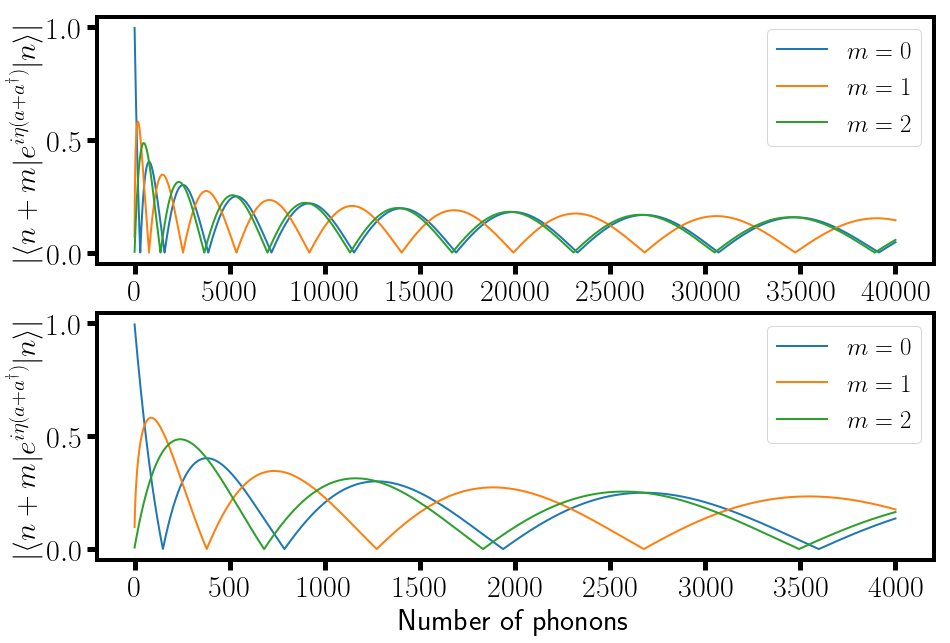

In [186]:
from scipy.special import assoc_laguerre as lag
from scipy.special import factorial
rcParams['axes.linewidth'] = 4
rcParams["figure.figsize"] = 15, 10

lam = 1762.e-9
hbar = 1.054e-34
k = 2*np.pi/lam
m = 133*1.66e-27
kb = 1.38e-23
omega_r = 2*np.pi*100e3
omega_z = omega_r/2.
gamma_493 = 2*np.pi*20e6

T_D = hbar*gamma_493/2/kb

#print 'Doppler temp (mK):', '{:.3e}'.format(T_D*1e3)

nbar_D_r= 1./(np.exp(hbar*omega_r/kb/T_D) -1 )
nbar_D_z= 1./(np.exp(hbar*omega_z/kb/T_D) -1 )
nbar_r = 1./(np.exp(hbar*omega_r/kb/T_r) -1 )
nbar_z = 1./(np.exp(hbar*omega_z/kb/T_z) -1 )

print 'Nbar Doppler radial :', '{:.1f}'.format(nbar_D_r)
print 'Nbar Doppler axial :', '{:.1f}'.format(nbar_D_z)
print 'Nbar radial :', '{:.1f}'.format(nbar_r)
print 'Nbar axial :', '{:.1f}'.format(nbar_z)

eta_r = k*np.sqrt(hbar/2/m/omega_r)
eta_z = k*np.sqrt(hbar/2/m/omega_z)

print r'Lamb-Dicke paramter radial :', '{:.3f}'.format(eta_r)
print r'Lamb-Dicke limit radial :', '{:.3f}'.format(eta_r*(2*nbar_r+1))

print r'Lamb-Dicke paramter axial :', '{:.3f}'.format(eta_z)
print r'Lamb-Dicke limit axial :', '{:.3f}'.format(eta_z*(2*nbar_z+1))

n = np.linspace(0,40000,40001)
m = 0
omega_rabi_c = np.exp(-1.*(eta_r**2)/2)*eta_r**m*lag(eta_r**2, n, m)

m = 1.0
omega_rabi_fs = np.exp(-1.*(eta_r**2)/2)*eta_r**m*lag(eta_r**2, n, m)/np.sqrt(n+m)

m = 2.
omega_rabi_ss = np.exp(-1.*(eta_r**2)/2)*eta_r**m*lag(eta_r**2, n, m)/np.sqrt((n+1)*(n+2))

subplot(2,1,1)
plot(n,abs(omega_rabi_c), linewidth = 2, label = r'$m = 0$')
plot(n,abs(omega_rabi_fs), linewidth = 2, label = r'$m = 1$')
plot(n,abs(omega_rabi_ss), linewidth = 2, label = r'$m = 2$')
tick_params(labelsize = 30)
tick_params(width=5, length=10)
xlabel('Number of phonons', fontsize = 30)
ylabel(r'$\vert\langle n + m\vert e^{i\eta(a+a^\dagger)}\vert n\rangle\vert$', fontsize = 30)
legend(fontsize = 25)

n = np.linspace(0,4000,4001)
m = 0
omega_rabi_c = np.exp(-1.*(eta_z**2)/2)*eta_z**m*lag(eta_z**2, n, m)

m = 1.0
omega_rabi_fs = np.exp(-1.*(eta_z**2)/2)*eta_z**m*lag(eta_z**2, n, m)/np.sqrt(n+m)

m = 2.
omega_rabi_ss = np.exp(-1.*(eta_z**2)/2)*eta_z**m*lag(eta_z**2, n, m)/np.sqrt((n+1)*(n+2))

subplot(2,1,2)
plot(n,abs(omega_rabi_c), linewidth = 2, label = r'$m = 0$')
plot(n,abs(omega_rabi_fs), linewidth = 2, label = r'$m = 1$')
plot(n,abs(omega_rabi_ss), linewidth = 2, label = r'$m = 2$')
tick_params(labelsize = 30)
tick_params(width=5, length=10)
xlabel('Number of phonons', fontsize = 30)
ylabel(r'$\vert\langle n + m\vert e^{i\eta(a+a^\dagger)}\vert n\rangle\vert$', fontsize = 30)
legend(fontsize = 25)

show()